# Predict Future Sales - Kaggle

### Team Members: Hrishikesh Reddy Tolmamdi

In [1]:
#install.packages("ggplot2")
#install.packages("readr")
#install.packages("plyr")
#install.packages("dplyr")
#install.packages("lubridate")
#install.packages("MLmetrics")
#install.packages("Metrics")
#install.packages("data.table")
#install.packages("MASS")

In [3]:
library(ggplot2)
library(readr)
library(plyr)
library(dplyr)
library(lubridate)
library(MLmetrics)
library(Metrics)
library(data.table)
library(MASS)

#### Read data

In [4]:
items <- read.csv("items.csv")
shops<- read.csv("shops.csv")
sales<- read.csv("sales_train.csv")
items_category<- read.csv("item_categories.csv")
test_data <- read.csv("test.csv")

In [5]:
summary(items_category)
summary(sales)
summary(shops)
summary(items)
summary(test_data)

 item_category_name item_category_id
 Length:84          Min.   : 0.00   
 Class :character   1st Qu.:20.75   
 Mode  :character   Median :41.50   
                    Mean   :41.50   
                    3rd Qu.:62.25   
                    Max.   :83.00   

     date           date_block_num     shop_id      item_id     
 Length:2935849     Min.   : 0.00   Min.   : 0   Min.   :    0  
 Class :character   1st Qu.: 7.00   1st Qu.:22   1st Qu.: 4476  
 Mode  :character   Median :14.00   Median :31   Median : 9343  
                    Mean   :14.57   Mean   :33   Mean   :10197  
                    3rd Qu.:23.00   3rd Qu.:47   3rd Qu.:15684  
                    Max.   :33.00   Max.   :59   Max.   :22169  
   item_price        item_cnt_day     
 Min.   :    -1.0   Min.   : -22.000  
 1st Qu.:   249.0   1st Qu.:   1.000  
 Median :   399.0   Median :   1.000  
 Mean   :   890.9   Mean   :   1.243  
 3rd Qu.:   999.0   3rd Qu.:   1.000  
 Max.   :307980.0   Max.   :2169.000  

  shop_name            shop_id     
 Length:60          Min.   : 0.00  
 Class :character   1st Qu.:14.75  
 Mode  :character   Median :29.50  
                    Mean   :29.50  
                    3rd Qu.:44.25  
                    Max.   :59.00  

  item_name            item_id      item_category_id
 Length:22170       Min.   :    0   Min.   : 0.00   
 Class :character   1st Qu.: 5542   1st Qu.:37.00   
 Mode  :character   Median :11084   Median :40.00   
                    Mean   :11084   Mean   :46.29   
                    3rd Qu.:16627   3rd Qu.:58.00   
                    Max.   :22169   Max.   :83.00   

       ID            shop_id         item_id     
 Min.   :     0   Min.   : 2.00   Min.   :   30  
 1st Qu.: 53550   1st Qu.:16.00   1st Qu.: 5382  
 Median :107100   Median :34.50   Median :11203  
 Mean   :107100   Mean   :31.64   Mean   :11019  
 3rd Qu.:160649   3rd Qu.:47.00   3rd Qu.:16072  
 Max.   :214199   Max.   :59.00   Max.   :22167  

#### Merge all data

In [6]:
##Creating Train as "all_data" with all required columns
all_data <- merge (sales, items, by = "item_id")

all_data$date <- dmy(all_data$date)
all_data$day <- day(all_data$date)

all_data$year <- year(all_data$date)
all_data$year <- as.factor(all_data$year)

all_data$month <- month(all_data$date)
all_data$month <- as.factor(all_data$month)

all_data$dayname <- weekdays(all_data$date)
all_data$dayname <- as.factor(all_data$dayname)

all_data$shop_id <- as.factor(all_data$shop_id)
all_data$item_id <- as.factor(all_data$item_id)
all_data$item_category_id <- as.factor(all_data$item_category_id)

all_data$daily_sales_value  <-  0

#Finding missing values
all_data$item_cnt_day[all_data$item_cnt_day < 0] <- NA
all_data$item_price[all_data$item_price < 0] <- NA

##Populating the missing values by the mean value

all_data$item_cnt_day[is.na(all_data$item_cnt_day)]<- round(mean(all_data$item_cnt_day, na.rm = "TRUE"))
all_data$item_price[is.na(all_data$item_price)]<- round(mean(all_data$item_price, na.rm = "TRUE"))

all_data$daily_sales_value <- all_data$item_price * all_data$item_cnt_day

head(all_data)
#str(all_data)
summary(all_data)

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_name,item_category_id,day,year,month,dayname,daily_sales_value
,<fct>,<date>,<int>,<fct>,<dbl>,<dbl>,<chr>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>
1,0,2014-09-01,20,54,58,1,! Ð’Ðž Ð’Ð›ÐÐ¡Ð¢Ð˜ ÐÐÐ’ÐÐ–Ð”Ð•ÐÐ˜Ð¯ (ÐŸÐ›ÐÐ¡Ð¢.) D,40,1,2014,9,Monday,58
2,1,2014-09-11,20,55,4490,1,"!ABBYY FineReader 12 Professional Edition Full [PC, Ð¦Ð¸Ñ„Ñ€Ð¾Ð²Ð°Ñ Ð²ÐµÑ€ÑÐ¸Ñ]",76,11,2014,9,Thursday,4490
3,1,2014-10-20,21,55,4490,1,"!ABBYY FineReader 12 Professional Edition Full [PC, Ð¦Ð¸Ñ„Ñ€Ð¾Ð²Ð°Ñ Ð²ÐµÑ€ÑÐ¸Ñ]",76,20,2014,10,Monday,4490
4,1,2014-04-04,15,55,4490,1,"!ABBYY FineReader 12 Professional Edition Full [PC, Ð¦Ð¸Ñ„Ñ€Ð¾Ð²Ð°Ñ Ð²ÐµÑ€ÑÐ¸Ñ]",76,4,2014,4,Friday,4490
5,1,2014-04-02,15,55,4490,1,"!ABBYY FineReader 12 Professional Edition Full [PC, Ð¦Ð¸Ñ„Ñ€Ð¾Ð²Ð°Ñ Ð²ÐµÑ€ÑÐ¸Ñ]",76,2,2014,4,Wednesday,4490
6,1,2014-07-06,18,55,4490,1,"!ABBYY FineReader 12 Professional Edition Full [PC, Ð¦Ð¸Ñ„Ñ€Ð¾Ð²Ð°Ñ Ð²ÐµÑ€ÑÐ¸Ñ]",76,6,2014,7,Sunday,4490


    item_id             date            date_block_num     shop_id       
 20949  :  31340   Min.   :2013-01-01   Min.   : 0.00   31     : 235636  
 5822   :   9408   1st Qu.:2013-08-01   1st Qu.: 7.00   25     : 186104  
 17717  :   9067   Median :2014-03-04   Median :14.00   54     : 143480  
 2808   :   7479   Mean   :2014-04-03   Mean   :14.57   28     : 142234  
 4181   :   6853   3rd Qu.:2014-12-05   3rd Qu.:23.00   57     : 117428  
 7856   :   6602   Max.   :2015-10-31   Max.   :33.00   42     : 109253  
 (Other):2865100                                        (Other):2001714  
   item_price         item_cnt_day       item_name         item_category_id 
 Min.   :     0.07   Min.   :   1.000   Length:2935849     40     : 564652  
 1st Qu.:   249.00   1st Qu.:   1.000   Class :character   30     : 351591  
 Median :   399.00   Median :   1.000   Mode  :character   55     : 339585  
 Mean   :   890.85   Mean   :   1.248                      19     : 208219  
 3rd Qu.:   999.00   3r

#### Getting to know the data

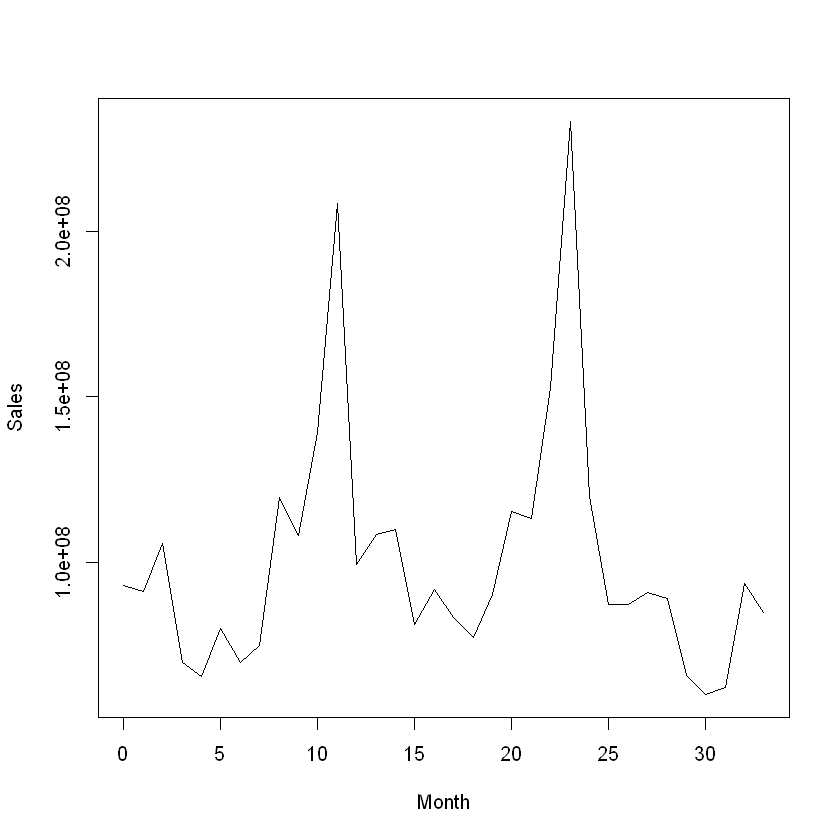

In [7]:
## Data exploration using the following plots 
monthwise_sales<- aggregate(all_data$daily_sales_value, 
                            by=list(all_data$date_block_num), FUN=sum)
shopIDwise_sales<- aggregate(all_data$daily_sales_value,
                              by=list(all_data$shop_id), FUN=sum)
itemIDwise_sales<- aggregate(all_data$daily_sales_value,
                             by=list(all_data$item_id), FUN=sum)
plot(monthwise_sales, type= 'l', xlab= "Month",ylab= "Sales")

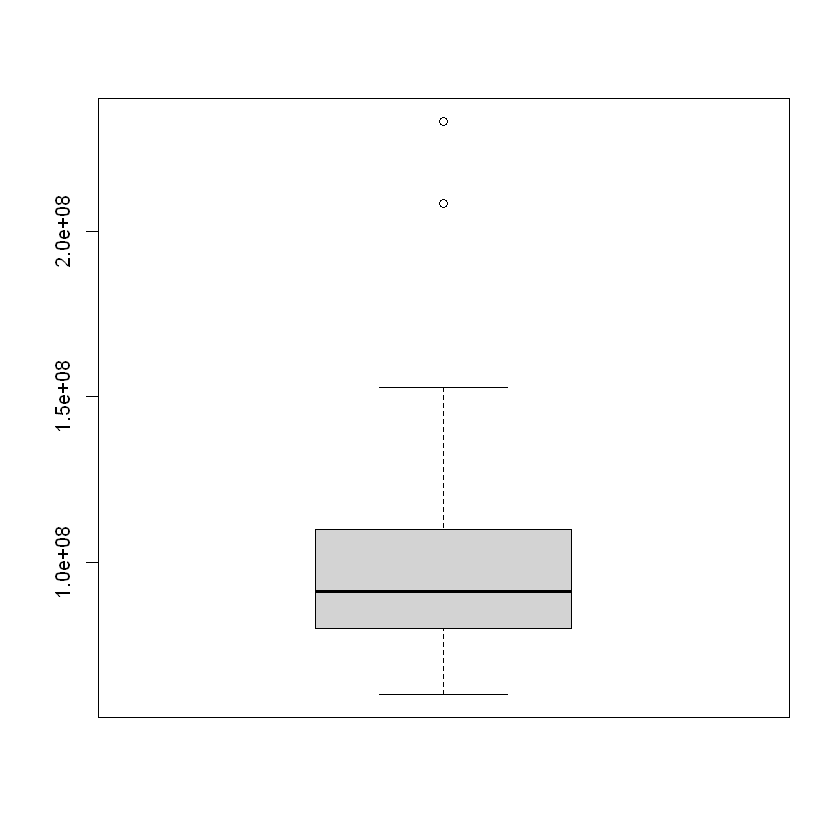

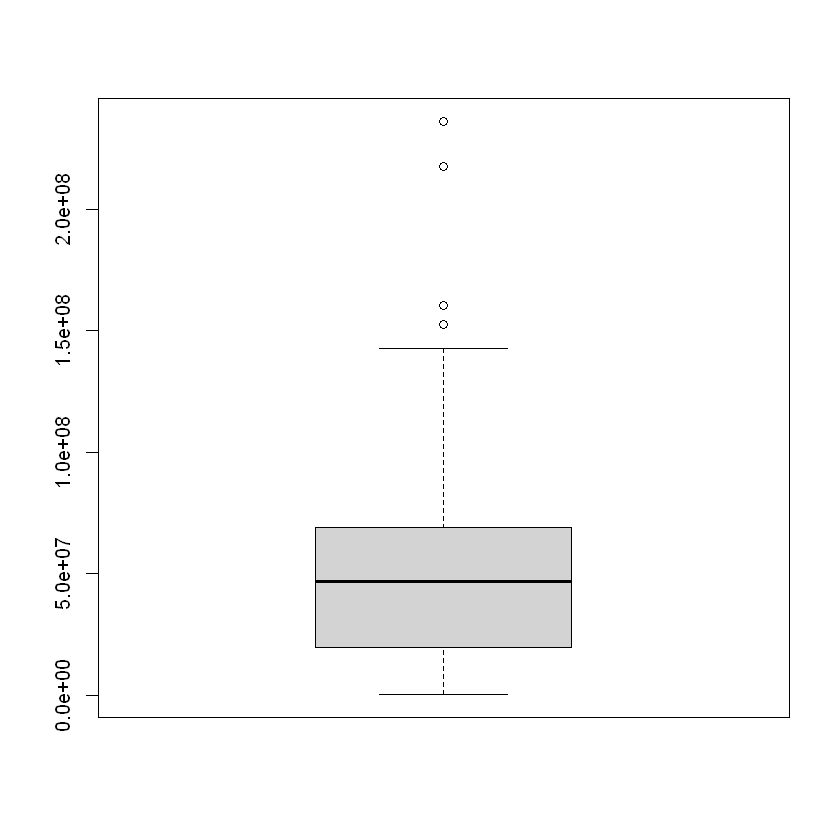

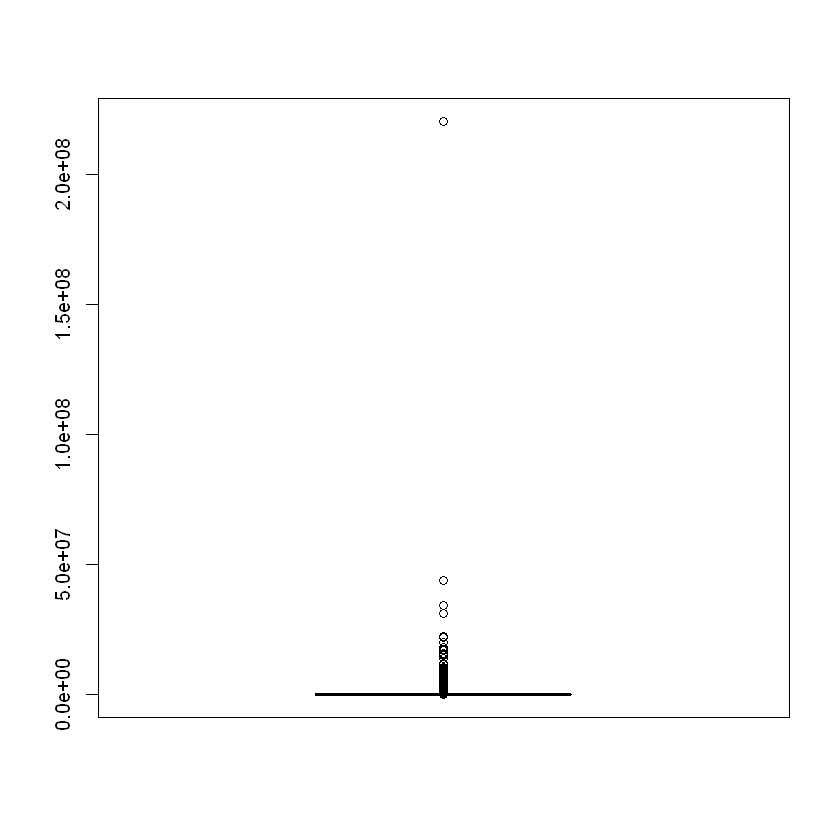

In [8]:
## Outliers detection using boxplot
boxplot(monthwise_sales$x)
boxplot(shopIDwise_sales$x)
boxplot(itemIDwise_sales$x)

In [9]:
#getting item_cnt_month for all_data
all_data  <-  as.data.table(all_data)
x  <-  c("date_block_num", "month","shop_id", "item_category_id", "item_id", "item_price")
all_data  <-  all_data[, list(item_cnt_month=(sum(item_cnt_day))/12), by = x]
all_data=as.data.frame(all_data)
all_data$item_cnt_month <- all_data$item_cnt_month + 2  #to avoid negative logs
head(all_data)

,date_block_num,month,shop_id,item_category_id,item_id,item_price,item_cnt_month
,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,20,9,54,40,0,58,2.083333
2,20,9,55,76,1,4490,2.083333
3,21,10,55,76,1,4490,2.083333
4,15,4,55,76,1,4490,2.166667
5,18,7,55,76,1,4490,2.083333
6,19,8,55,76,1,4490,2.083333


#### CROSS VALIDATION

In [10]:
### CROSS VALIDATION by splitting all_data into train (jan 2013 to sept 2015) and test (oct 2015)

##traindata
a<-all_data$date_block_num!=33
traincross<-all_data[a,]
traincross<-traincross[,c(1,2,4,7)]
head(traincross)

##testdata
b<-all_data$date_block_num==33
testcross_act<-all_data[b,]
testcross_pred<-testcross_act[,c(1,2,4)]
#head(testcross_act)
head(testcross_pred)

,date_block_num,month,item_category_id,item_cnt_month
,<int>,<fct>,<fct>,<dbl>
1,20,9,40,2.083333
2,20,9,76,2.083333
3,21,10,76,2.083333
4,15,4,76,2.166667
5,18,7,76,2.083333
6,19,8,76,2.083333


,date_block_num,month,item_category_id
,<int>,<fct>,<fct>
484,33,10,40
811,33,10,37
817,33,10,37
846,33,10,37
884,33,10,37
888,33,10,37


#### Model for cross validation

In [11]:
#### Linear Model transformed by log for cross validation
cross_model = lm(formula=log(item_cnt_month)~., data = traincross)
summary(cross_model)


Call:
lm(formula = log(item_cnt_month) ~ ., data = traincross)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3503 -0.0312 -0.0180  0.0043  3.8196 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         7.359e-01  5.226e-02  14.080  < 2e-16 ***
date_block_num     -3.898e-04  8.044e-06 -48.453  < 2e-16 ***
month2             -2.042e-03  3.110e-04  -6.564 5.22e-11 ***
month3              7.523e-04  3.096e-04   2.430  0.01511 *  
month4             -2.083e-03  3.241e-04  -6.428 1.29e-10 ***
month5             -3.993e-03  3.250e-04 -12.286  < 2e-16 ***
month6             -3.061e-03  3.227e-04  -9.485  < 2e-16 ***
month7             -4.266e-03  3.241e-04 -13.162  < 2e-16 ***
month8             -3.941e-03  3.204e-04 -12.300  < 2e-16 ***
month9              2.361e-03  3.337e-04   7.075 1.49e-12 ***
month10             6.760e-03  3.603e-04  18.762  < 2e-16 ***
month11             8.987e-03  3.580e-04  25.105  < 2e-16 ***
month12             1

#### Prediction for cross validation test and train

In [12]:
## prediction for cross validation

pred_cross <- predict(cross_model, newdata = testcross_pred, type="response")
pred_cross <- exp(pred_cross) - 2
head(pred_cross)

484       811       817       846       884       888 
0.1414117 0.1135296 0.1135296 0.1135296 0.1135296 0.1135296

### Accuracy of the Model

In [13]:
### RMSE and MSE for the cross validated predictions with actual known values

actual_cross<-testcross_act$item_cnt_month-2

r=rmse(actual_cross,pred_cross)
m=MSE(pred_cross,actual_cross)
r
m
paste(r, "is RMSE")
paste(m, "is MSE")

[1] 1.096965

[1] 1.203332

[1] "1.0969649837042 is RMSE"

[1] "1.20333217547317 is MSE"

### Train data

In [14]:
#### Train data (Jan 2013 to Oct 2015) to predict for Nov 2015
train_data  <- all_data[c(1,2,3,4,7)]
head(train_data)

,date_block_num,month,shop_id,item_category_id,item_cnt_month
,<int>,<fct>,<fct>,<fct>,<dbl>
1,20,9,54,40,2.083333
2,20,9,55,76,2.083333
3,21,10,55,76,2.083333
4,15,4,55,76,2.166667
5,18,7,55,76,2.083333
6,19,8,55,76,2.083333


### Model for all Train data

In [15]:
#### Linear Model transformed by log for prediction of Nov 2015
nov_model = lm(formula=log(item_cnt_month)~., data = train_data)
summary(nov_model)


Call:
lm(formula = log(item_cnt_month) ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3608 -0.0337 -0.0151  0.0055  4.2952 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         7.432e-01  5.161e-02  14.402  < 2e-16 ***
date_block_num     -3.836e-04  7.923e-06 -48.414  < 2e-16 ***
month2             -2.261e-03  3.074e-04  -7.356 1.89e-13 ***
month3              5.715e-04  3.067e-04   1.864 0.062388 .  
month4             -2.643e-03  3.211e-04  -8.231  < 2e-16 ***
month5             -4.414e-03  3.220e-04 -13.708  < 2e-16 ***
month6             -3.322e-03  3.197e-04 -10.391  < 2e-16 ***
month7             -4.526e-03  3.209e-04 -14.103  < 2e-16 ***
month8             -3.980e-03  3.171e-04 -12.548  < 2e-16 ***
month9              2.291e-03  3.300e-04   6.943 3.84e-12 ***
month10             2.414e-03  3.339e-04   7.229 4.85e-13 ***
month11             8.683e-03  3.542e-04  24.512  < 2e-16 ***
month12             1

### Test Data

In [16]:
### Test data for Nov 2015 prediction

test_data$month <- as.factor(11)         #Nov is month 11
test_data$shop_id <- as.factor(test_data$shop_id)
test_data$date_block_num <- 34           #latest month for given data
head(test_data)

,ID,shop_id,item_id,month,date_block_num
,<int>,<fct>,<int>,<fct>,<dbl>
1,0,5,5037,11,34
2,1,5,5320,11,34
3,2,5,5233,11,34
4,3,5,5232,11,34
5,4,5,5268,11,34
6,5,5,5039,11,34


In [17]:
#####Updating test_data with items info
nov_test <- join (test_data, items, by = c("item_id"))
nov_test$item_category_id <- as.factor(nov_test$item_category_id)
head(nov_test)

,ID,shop_id,item_id,month,date_block_num,item_name,item_category_id
,<int>,<fct>,<int>,<fct>,<dbl>,<chr>,<fct>
1,0,5,5037,11,34,"NHL 15 [PS3, Ñ€ÑƒÑÑÐºÐ¸Ðµ ÑÑƒÐ±Ñ‚Ð¸Ñ‚Ñ€Ñ‹]",19
2,1,5,5320,11,34,ONE DIRECTION Made In The A.M.,55
3,2,5,5233,11,34,"Need for Speed Rivals (Essentials) [PS3, Ñ€ÑƒÑÑÐºÐ°Ñ Ð²ÐµÑ€ÑÐ¸Ñ]",19
4,3,5,5232,11,34,"Need for Speed Rivals (Classics) [Xbox 360, Ñ€ÑƒÑÑÐºÐ°Ñ Ð²ÐµÑ€ÑÐ¸Ñ]",23
5,4,5,5268,11,34,"Need for Speed [PS4, Ñ€ÑƒÑÑÐºÐ°Ñ Ð²ÐµÑ€ÑÐ¸Ñ]",20
6,5,5,5039,11,34,"NHL 15 [Xbox 360, Ñ€ÑƒÑÑÐºÐ¸Ðµ ÑÑƒÐ±Ñ‚Ð¸Ñ‚Ñ€Ñ‹]",23


### Predictions

In [18]:
####Predictions for November 2015
pred_nov <- predict(nov_model, newdata = nov_test, type="response")
pred_nov <- exp(pred_nov) - 2
head(pred_nov)

1          2          3          4          5          6 
0.15174156 0.08808599 0.15174156 0.13351054 0.25963345 0.13351054

### Final Result

In [19]:
####Result of predictions for Nov 2015
nov_test$item_cnt_month <- pred_nov
result <- nov_test[c(1,8)]
head(result)

,ID,item_cnt_month
,<int>,<dbl>
1,0,0.15174156
2,1,0.08808599
3,2,0.15174156
4,3,0.13351054
5,4,0.25963345
6,5,0.13351054
